In [1]:
# Is there a gen mutation of iris setosa setal leaves?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats 

In [3]:
#Hier heisst "ref", dass es sich um die "Referenz"daten handelt. Diese dienen als Referenz um zu beurteilen,
#ob die Iris-Setosa des Bauern mutiert sind.
df_ref = pd.read_csv("iris.csv", names = ["slength", "swidth", "plength", "pwidth", "species"])
df_iris_setosa_ref = df_ref[df_ref["species"]=="Iris-setosa"]
df_iris_virginica_ref = df_ref[df_ref["species"]=="Iris-virginica"]
df_iris_versicolor_ref = df_ref[df_ref["species"]=="Iris-versicolor"]

In [4]:
#Hier heisst "ref", dass es sich um die "Referenz"daten handelt. Diese dienen als Referenz um zu beurteilen,
#ob die Iris-Setosa des Bauern mutiert sind.
df_ref = pd.read_csv("iris.csv", names = ["slength", "swidth", "plength", "pwidth", "species"])
df_iris_setosa_ref = df_ref[df_ref["species"]=="Iris-setosa"]
df_iris_virginica_ref = df_ref[df_ref["species"]=="Iris-virginica"]
df_iris_versicolor_ref = df_ref[df_ref["species"]=="Iris-versicolor"]

In [5]:
df_iris_setosa_ref.head()

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_iris_setosa_ref.describe()

,slength,swidth,plength,pwidth
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [7]:
df_iris_virginica_ref.describe()

,slength,swidth,plength,pwidth
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [8]:
df_iris_versicolor_ref.describe()

,slength,swidth,plength,pwidth
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [9]:
#Nun testen wir, ob die Referenzdaten durch eine Normalverteilung angenähert werden können
print('p-value from the normality test on the setal widths and lengths (D-Agostino-Pearson):')
datasets = [df_iris_setosa_ref["slength"],df_iris_setosa_ref["swidth"],
            df_iris_setosa_ref["plength"],df_iris_setosa_ref["pwidth"],
            df_iris_virginica_ref["slength"],df_iris_virginica_ref["swidth"],
            df_iris_virginica_ref["plength"],df_iris_virginica_ref["pwidth"],
            df_iris_versicolor_ref["slength"],df_iris_versicolor_ref["swidth"],
            df_iris_versicolor_ref["plength"],df_iris_versicolor_ref["pwidth"]]
dataset_labels = ["Iris Setosa setal length", "Iris Setosa setal width",
                  "Iris Setosa petal length", "Iris Setosa petal width",
                  "Iris Virginica setal length", "Iris Virginica setal width",
                  "Iris Virginica petal length", "Iris Virginica petal width",
                  "Iris Versicolor setal length", "Iris Versicolor setal width",
                  "Iris Versicolor petal length", "Iris Versicolor petal width"]

i=0
for dataset in datasets:
    k2, p = stats.normaltest(dataset)
    if i == 0:
        SL_p_value = p
    print('%10s %1.6f' % (dataset_labels[i],p))
    i += 1

p-value from the normality test on the setal widths and lengths (D-Agostino-Pearson):
Iris Setosa setal length 0.907482
Iris Setosa setal width 0.388917
Iris Setosa petal length 0.332171
Iris Setosa petal width 0.001019
Iris Virginica setal length 0.900820
Iris Virginica setal width 0.277087
Iris Virginica petal length 0.259347
Iris Virginica petal width 0.538381
Iris Versicolor setal length 0.656572
Iris Versicolor setal width 0.484091
Iris Versicolor petal length 0.190302
Iris Versicolor petal width 0.848990


In [10]:
#Auch hier liegt eine Normalverteilung vor
#Now we create a new data set per random generator, which should represent the farmer Iris.

pts = 50
np.random.seed(2000)
df_iris_setosa_slength_farmer = np.random.normal(5.0,0.35, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_setosa_swidth_farmer = np.random.normal(3.4,0.38, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_setosa_plength_farmer = np.random.normal(1.46,0.174, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_setosa_pwidth_farmer = np.random.normal(0.24,0.107, size = pts) * np.random.normal(1.1,0.1, size = pts)

df_iris_virginica_slength_farmer = np.random.normal(6.6,0.64, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_virginica_swidth_farmer = np.random.normal(2.97,0.32, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_virginica_plength_farmer = np.random.normal(5.55,0.55, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_virginica_pwidth_farmer = np.random.normal(2.0,0.27, size = pts) * np.random.normal(1.1,0.1, size = pts)

df_iris_versicolor_slength_farmer = np.random.normal(5.9,0.52, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_versicolor_swidth_farmer = np.random.normal(2.77,0.31, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_versicolor_plength_farmer = np.random.normal(4.26,0.47, size = pts) * np.random.normal(1.1,0.1, size = pts)
df_iris_versicolor_pwidth_farmer = np.random.normal(1.32,0.20, size = pts) * np.random.normal(1.1,0.1, size = pts)

#Zusammenfassen der Daten für Setosa (siehe "Datenanalyse mit Phyton Seite 384"):
data_Setosa_farmer = pd.DataFrame({ 
    "slength":df_iris_setosa_slength_farmer, 
    "swidth":df_iris_setosa_swidth_farmer,
    "plength":df_iris_setosa_plength_farmer,
    "pwidth":df_iris_setosa_pwidth_farmer
})

#Zusammenfassen der Daten für Virginica:
data_Virginica_farmer = pd.DataFrame({ 
    "slength":df_iris_virginica_slength_farmer, 
    "swidth":df_iris_virginica_swidth_farmer,
    "plength":df_iris_virginica_plength_farmer,
    "pwidth":df_iris_virginica_pwidth_farmer
})

#Zusammenfassen der Daten für Versicolor:
data_Versicolor_farmer = pd.DataFrame({ 
    "slength":df_iris_versicolor_slength_farmer, 
    "swidth":df_iris_versicolor_swidth_farmer,
    "plength":df_iris_versicolor_plength_farmer,
    "pwidth":df_iris_versicolor_pwidth_farmer
})

#Combination of Setosa, Virginica and Versicolor to one (anonymized) data frame:
df_farmer = data_Setosa_farmer.append(data_Virginica_farmer.append(data_Versicolor_farmer)) #Warum geht hier der .append-Befehl? data-array


#df_farmer = np.concatenate((data_Setosa, data_Virginica, data_Versicolor))
df_farmer

,slength,swidth,plength,pwidth
0,7.512300,3.472900,1.892329,0.304084
1,6.305038,3.356097,1.647476,0.279527
2,4.818646,4.575827,1.380733,0.165094
3,6.024839,4.042857,1.585929,0.203635
4,5.792077,3.278056,2.251739,0.113221
5,4.720147,4.530280,1.780697,0.361521
6,5.603299,2.688665,1.376247,0.323810
7,5.207279,3.363527,1.691324,0.331207
8,5.440326,4.221590,1.757680,0.192102
9,5.510868,3.503239,1.439029,0.219371


In [11]:
#Testing, if the random data follow a normal distribution:
k2, p1 = stats.normaltest(df_iris_setosa_slength_farmer)
k2, p2 = stats.normaltest(df_iris_setosa_swidth_farmer) 
k2, p3 = stats.normaltest(df_iris_setosa_plength_farmer)
k2, p4 = stats.normaltest(df_iris_setosa_pwidth_farmer)
print('p1 = ',p1)
print('p2 = ',p2)
print('p3 = ',p3)
print('p4 = ',p4)

p1 =  0.03228622355716094
p2 =  0.7787970199442172
p3 =  0.4259353717051687
p4 =  0.9780661032216079


In [12]:
#df_farmer

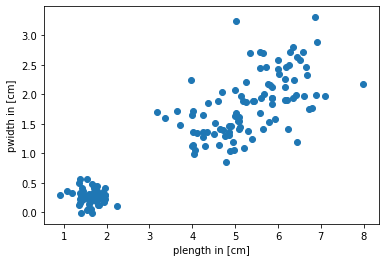

In [13]:
plt.scatter(df_farmer['plength'],df_farmer['pwidth'])
plt.xlabel("plength in [cm]")
plt.ylabel("pwidth in [cm]")
plt.savefig("scatterplot farmers data set")

In [14]:
#We suppose, known from the reference data, that the Iris Setosa has the smallest dimensions
#for the parameters petal length (< 2.5 cm) and pe'tal width (< 0.7 cm). For this reason we extract
df_farmer = df_farmer.sort_values('plength')

In [15]:
df_farmer_Setosa = df_farmer[df_farmer["plength"] < 2.0]
#df_farmer_Setosa

In [16]:
#To decide, which t-test should be applied, we should remind, that the two samples the reference data and
# the farmers data nomrmal normal distributed and are unpaired data. Beyond that we have to test the SD
#of the two samples if they differ or not:

In [17]:
mean_slength, sd_slength = scipy.stats.norm.fit(df_iris_setosa_slength_farmer)
mean_swidth, sd_swidth = scipy.stats.norm.fit(df_iris_setosa_swidth_farmer)
print("mean_slength",mean_slength, "sd_slength", sd_slength)
print("mean_swidth",mean_swidth, "sd_swidth", sd_swidth)

mean_slength 5.588269109619916 sd_slength 0.6488794354321592
mean_swidth 3.81711382410127 sd_swidth 0.5017413708964301


In [18]:
#The standard devidation is 0.65 for the farmers slenght and 0.50 for farmers swidth and differs from
#SD from reference data --> ttest .ttest_ind(equal_var=False) 

In [19]:
#Now we perform the p-test to decide, wether the setal length of iris setosa is mutated to larger lengths
t_SL, p_SL = stats.ttest_ind(df_farmer_Setosa['slength'], df_iris_setosa_ref['slength'],equal_var=False)
t_SL, p_SL

(5.4102873392930135, 7.648256516727694e-07)

In [20]:
#With a p-value < 0.05 the null hypothesis cannot be withdrawn

In [21]:
#Now we perform the p-test to decide, wether the setal width of iris setosa is mutated to larger lengths
stats.ttest_ind(df_farmer_Setosa['swidth'], df_iris_setosa_ref['swidth'], equal_var=False)

Ttest_indResult(statistic=4.548633002038439, pvalue=1.69494247590523e-05)

In [22]:
datasets        = [df_farmer_Setosa['slength'],df_iris_setosa_ref['slength'],df_farmer_Setosa['swidth'],df_iris_setosa_ref['swidth']]
dataset_labels = ['Setal Length Setosa Farmer','Setal Length Setosa Reference','Setal Width Setosa Farmer','Setal Width Setosa Reference']
plot_labels = ['Farmer', 'Reference']
#print(datasets[3])

In [23]:
mean_values = [0, 0, 0, 0]
sd_values = [0, 0, 0, 0]
i=0
for dataset in datasets:
    mean, sd = scipy.stats.norm.fit(datasets[i])
    mean_values[i] = mean
    sd_values[i] = sd
    i+=1
#print(mean_values,sd_values)

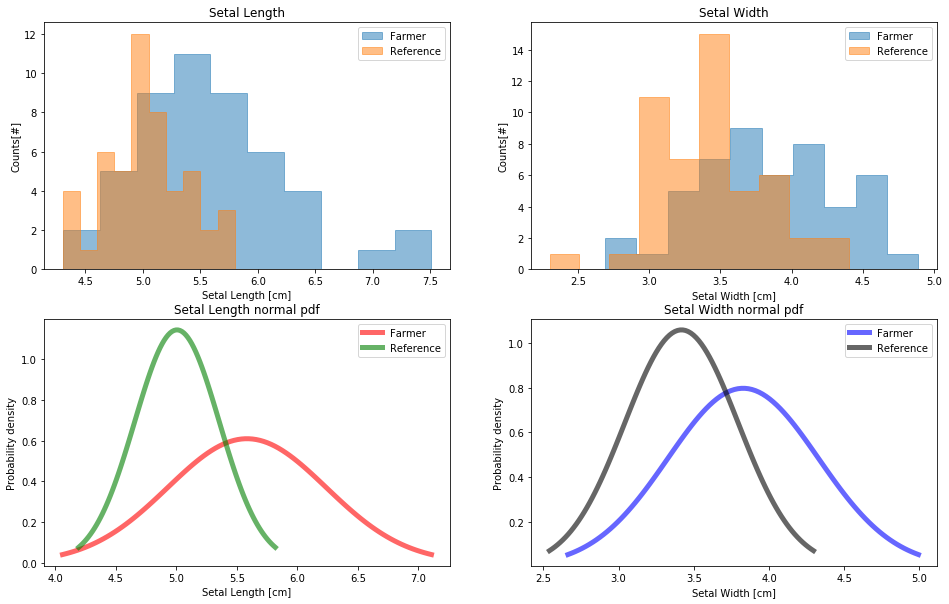

In [35]:
#This code is used for generating figure
plt.figure(figsize=(16,10))     #generate the figure object

#Generate the subplot at the left upper corner
ax1 = plt.subplot(2,2,1)
plt.title('Setal Length')
i=0
for dataset in datasets[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.5,histtype='step',label=plot_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
ax1.set_xlabel('Setal Length [cm]')
ax1.set_ylabel('Counts[#]')
plt.legend()

#Generate the subplot at the right upper corner
ax2 = plt.subplot(2,2,2)
plt.title('Setal Width')
i=2
for dataset in datasets[2:4]:
    dataset.plot(kind="hist",fill=True,alpha=0.5,histtype='step',label=plot_labels[i-2])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
ax2.set_xlabel('Setal Width [cm]')
ax2.set_ylabel('Counts[#]')
plt.legend()

pdf_colors = ['r-','g-', 'b-', 'k-']       #define the colors for the pdf lines

#Generate the subplot at the left lower corner
ax3 = plt.subplot(2,2,3)
plt.title('Setal Length normal pdf')
i=0
for dataset in datasets[0:2]:
    x = np.linspace(stats.norm.ppf(0.01,loc=mean_values[i],scale=sd_values[i]), stats.norm.ppf(0.99,loc=mean_values[i],scale=sd_values[i]), 100)
    ax3.plot(x, stats.norm.pdf(x,loc=mean_values[i],scale=sd_values[i]), pdf_colors[i], lw=5, alpha=0.6, label=plot_labels[i])
    i+=1
ax3.set_xlabel('Setal Length [cm]')
ax3.set_ylabel('Probability density')
plt.legend()

#Generate the subplot at the right lower corner
ax4 = plt.subplot(2,2,4)
plt.title('Setal Width normal pdf')
i=2
for dataset in datasets[2:4]:
    x = np.linspace(stats.norm.ppf(0.01,loc=mean_values[i],scale=sd_values[i]), stats.norm.ppf(0.99,loc=mean_values[i],scale=sd_values[i]), 100)
    ax4.plot(x, stats.norm.pdf(x,loc=mean_values[i],scale=sd_values[i]), pdf_colors[i], lw=5, alpha=0.6, label=plot_labels[i-2])
    i+=1
ax4.set_xlabel('Setal Width [cm]')
ax4.set_ylabel('Probability density')
plt.legend()
plt.savefig("mutation_setal_hist_pdf")
plt.show()

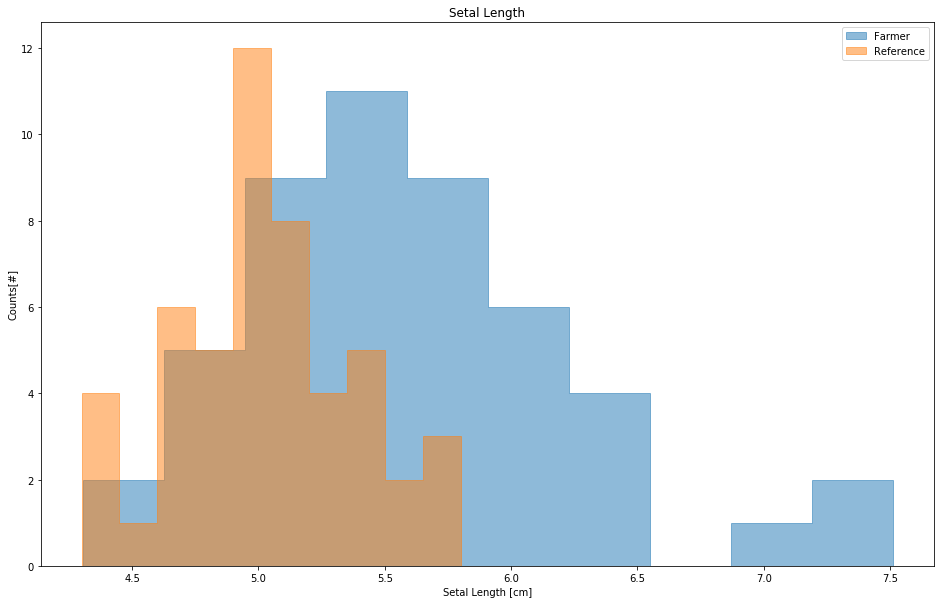

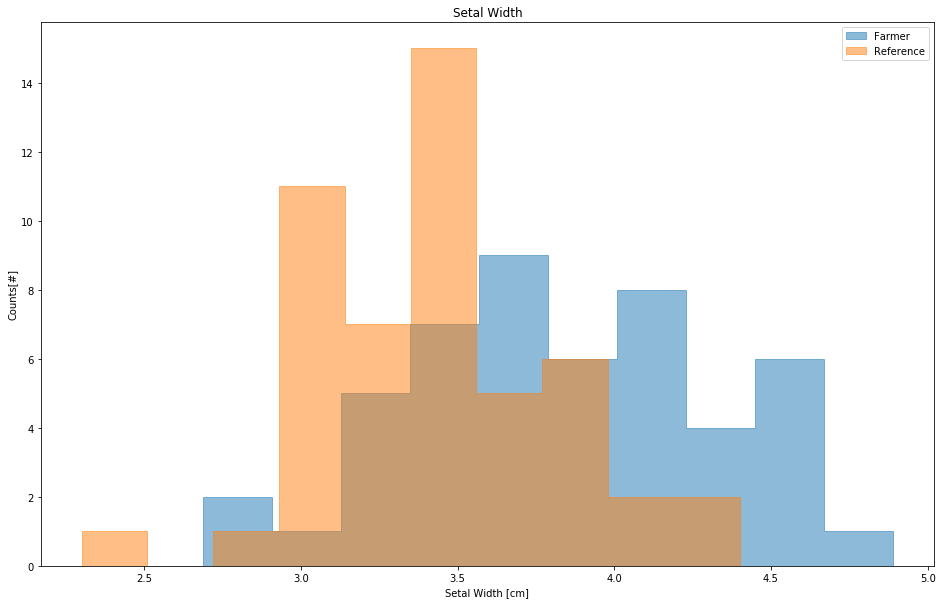

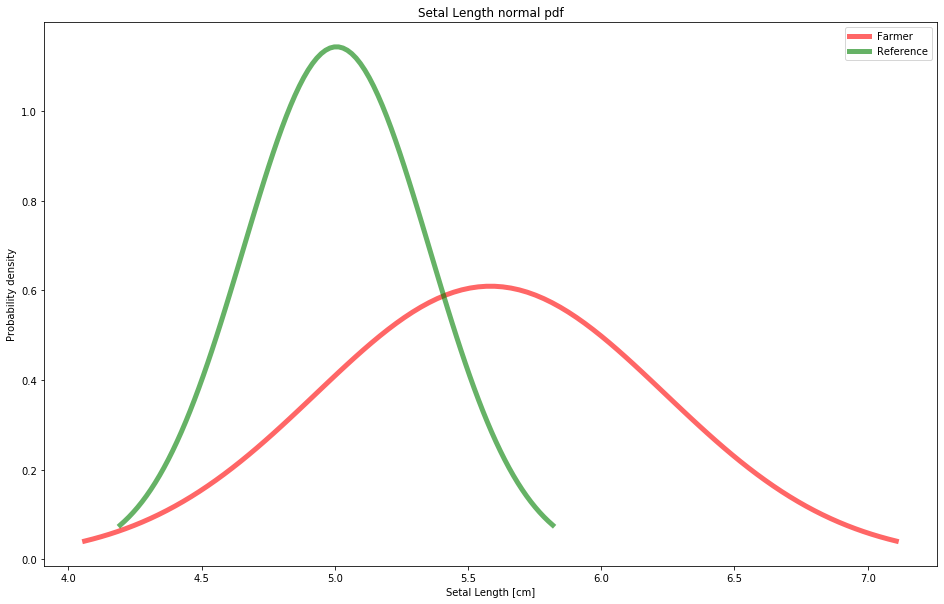

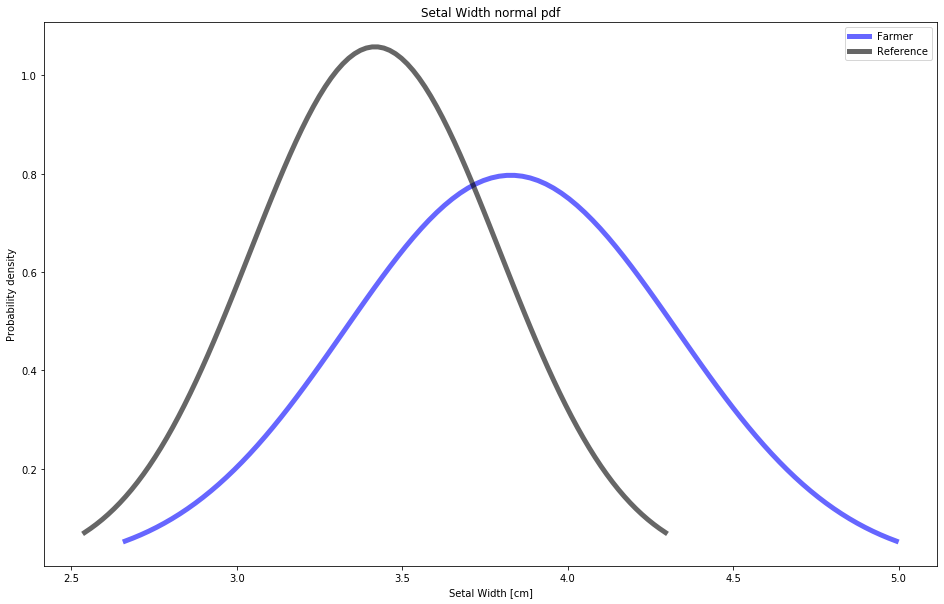

In [25]:
#This code is used for generating separate figures for each plot
#Generate the figure showing the setal length histograms 
figure1 = plt.figure(figsize=(16,10))     #generate the first figure object
ax1 = plt.axes()

plt.title('Setal Length')
i=0
for dataset in datasets[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.5,histtype='step',label=plot_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
ax1.set_xlabel('Setal Length [cm]')
ax1.set_ylabel('Counts[#]')
plt.legend()
plt.savefig("mutation_setal_length_hist")
plt.show()

#Generate the figure showing the setal width histograms
figure2 = plt.figure(figsize=(16,10))     #generate the second figure object
ax2 = plt.axes()

plt.title('Setal Width')
i=2
for dataset in datasets[2:4]:
    dataset.plot(kind="hist",fill=True,alpha=0.5,histtype='step',label=plot_labels[i-2])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
ax2.set_xlabel('Setal Width [cm]')
ax2.set_ylabel('Counts[#]')
plt.legend()
plt.savefig("mutation_setal_width_hist")
plt.show()

pdf_colors = ['r-','g-', 'b-', 'k-']       #define the colors for the pdf lines

#Generate the figure showing the setal length probability distributions
figure3 = plt.figure(figsize=(16,10))     #generate the third figure object
ax3 = plt.axes()

plt.title('Setal Length normal pdf')
i=0
for dataset in datasets[0:2]:
    x = np.linspace(stats.norm.ppf(0.01,loc=mean_values[i],scale=sd_values[i]), stats.norm.ppf(0.99,loc=mean_values[i],scale=sd_values[i]), 100)
    plt.plot(x, stats.norm.pdf(x,loc=mean_values[i],scale=sd_values[i]), pdf_colors[i], lw=5, alpha=0.6, label=plot_labels[i])
    i+=1
ax3.set_xlabel('Setal Length [cm]')
ax3.set_ylabel('Probability density')
plt.legend()
plt.savefig("mutation_setal_length_pdf")
plt.show()

#Generate the figure showing the setal width probability distributions
figure4 = plt.figure(figsize=(16,10))     #generate the fourth figure object
ax4 = plt.axes()

plt.title('Setal Width normal pdf')
i=2
for dataset in datasets[2:4]:
    x = np.linspace(stats.norm.ppf(0.01,loc=mean_values[i],scale=sd_values[i]), stats.norm.ppf(0.99,loc=mean_values[i],scale=sd_values[i]), 100)
    plt.plot(x, stats.norm.pdf(x,loc=mean_values[i],scale=sd_values[i]), pdf_colors[i], lw=5, alpha=0.6, label=plot_labels[i-2])
    i+=1
ax4.set_xlabel('Setal Width [cm]')
ax4.set_ylabel('Probability density')
plt.legend()
plt.savefig("mutation_setal_width_pdf")
plt.show()

In [26]:
SL_p_value_string = '{:5.3f}'.format(SL_p_value)
p_SL_string = '{:5.3e}'.format(p_SL)
print(SL_p_value_string,p_SL_string)

0.907 7.648e-07


In [27]:
#Generate a table with two p-values; it works but the output is not as nice as using plotly in the next cell
#table_cells = [[SL_p_value_string],[p_SL_string]]   #first p-value comes from the normality test for rhe reference setal length sample
                                            #second p-value comes from the t-test applied to the reference and farmer samples
#print(table_cells)
#label_rows = ['reference','t-test']
#label_columns = ['p-value']
#plt.table(table_cells,cellLoc='center',rowLabels=label_rows,colLabels=label_columns,loc='center')
#plt.savefig("mutation_table_p_values")
#plt.show()

In [28]:
#Generate a table with two p-values using plotly
fig = go.Figure(data=go.Table(
    header=dict(values=['', 'p-value'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[['reference','t-test'], # 1st column
                       [SL_p_value_string, p_SL_string]], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center')))
fig.update_layout(width=300, height=300)
fig.write_image("mutation_table_p_values.png")

ValueError: 
For some reason plotly.py was unable to communicate with the
local orca server process, even though the server process seems to be running.

Please review the process and connection information below:

orca status
-----------
    state: running
    executable: C:\Users\freunekm\Anaconda3\orca.CMD
    version: 1.2.1
    port: 65328
    pid: 41352
    command: ['C:\\Users\\freunekm\\Anaconda3\\orca.CMD', 'serve', '-p', '65328', '--plotly', 'C:\\Users\\freunekm\\Anaconda3\\lib\\site-packages\\plotly\\package_data\\plotly.min.js', '--graph-only', '--mathjax', 'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js']


